# 00 Environment

#### 👉Before you solve a Reinforcement Learning problem you need to define what are
- the actions
- the states of the world
- the rewards

#### 👉We are using the `CartPole-v0` environment from [OpenAI's gym](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

#### 👉`CartPole-v0` is not an extremely difficult environment. However, it is complex enough to force us level up our game. The tools we will use to solve it are really powerful.

#### 👉Let's explore it!

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Load the environment 🌎

In [4]:
import gym
env = gym.make('CartPole-v1', render_mode = 'rgb_array')

## The goal
### is to keep the pole in an upright position as long as you can by moving the cart a the bottom, left and right.

![title](../images/cart_pole.jpg)

## Let's see how a good agent solves this problem

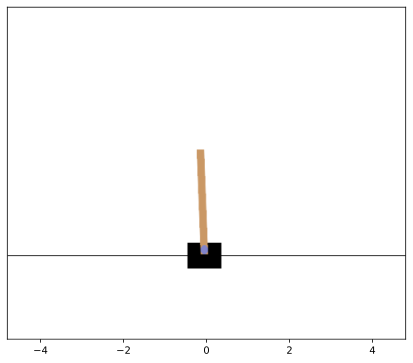

In [5]:
env.reset()
frame = env.render()

fig, ax = plt.subplots(figsize=(8, 6))
ax.axes.yaxis.set_visible(False)
min_x = env.observation_space.low[0]
max_x = env.observation_space.high[0]
ax.imshow(frame, extent=[min_x, max_x, 0, 8])



## State space

In [6]:
# The state consists of 4 numbers:
x_min, v_min, angle_min, angular_v_min = env.observation_space.low
x_max, v_max, angle_max, angular_v_max = env.observation_space.high

print(f'Cart position from {x_min:.2f} to {x_max:.2f}')
print(f'Cart velocity from {v_min:.2E} to {v_max:.2E}')
print(f'Angle from {angle_min:.2f} to {angle_max:.2f}')
print(f'Angular velocity from {angular_v_min:.2E} to {angular_v_max:.2E}')

Cart position from -4.80 to 4.80
Cart velocity from -3.40E+38 to 3.40E+38
Angle from -0.42 to 0.42
Angular velocity from -3.40E+38 to 3.40E+38


[IMAGE]

### The ranges for the cart velocity and pole angular velocity are a bit too large, aren't they?

👉 As a general principle, the high/low state values you can read from `env.observation_space`
are set very conservatively, to guarantee that the state value alwayas lies between the max and the min.

👉In practice, you need to simulate a few interactions with the environment to really see the actual intervals where the state components lie.

👉 Knowing the max and min values for each state component is going to be useful later when we normalize the inputs to our Parametric models.

## Action space

- `0` Push cart to the left
- `1` Push cart to the right

In [7]:
print("Action Space {}".format(env.action_space))

Action Space Discrete(2)


## Rewards

- A reward of -1 is awarded if the position of the car is less than 0.5.
- The episode ends once the car's position is above 0.5, or the max number of steps has been reached: `n_steps >= env._max_episode_steps`

A default negative reward of -1 encourages the car to escape the valley as fast as possible.